In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Load all CSV files

Dfs = []

COLUMN_RENAMING = {
    # Country/Region
    'Country': 'country',
    'Country or region': 'country',
    'Country Name': 'country',
    'Region': 'region',
    
    # Happiness Metrics
    'Happiness Rank': 'happiness_rank',
    'Happiness.Rank': 'happiness_rank',
    'Overall rank': 'happiness_rank',
    'Happiness Score': 'happiness_score',
    'Happiness.Score': 'happiness_score',
    'Score': 'happiness_score',
    
    # Economy
    'Economy (GDP per Capita)': 'gdp_per_capita',
    'Economy..GDP.per.Capita.': 'gdp_per_capita',
    'GDP per capita': 'gdp_per_capita',
    
    # Social Support
    'Family': 'social_support',
    'Social support': 'social_support',
    
    # Health
    'Health (Life Expectancy)': 'life_expectancy',
    'Health..Life.Expectancy.': 'life_expectancy',
    'Healthy life expectancy': 'life_expectancy',
    
    # Freedom
    'Freedom': 'freedom',
    'Freedom to make life choices': 'freedom',
    
    # Corruption
    'Trust (Government Corruption)': 'corruption',
    'Trust..Government.Corruption.': 'corruption',
    'Perceptions of corruption': 'corruption',
    
    # Other
    'Generosity': 'generosity',
    'Dystopia Residual': 'dystopia_residual',
    'Dystopia.Residual': 'dystopia_residual',
    'Standard Error': 'standard_error',  # Rename or drop later
    'year': 'year'
}

COLUMNS_TO_DROP = [
    'Standard Error', 'Lower Confidence Interval', 'Upper Confidence Interval',
    'Whisker.high', 'Whisker.low', 'Happiness.Rank', 'Overall rank'
]

for year in range(2015, 2020):
    file_path = f"../data/raw/{year}.csv"
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path)
            df = df.rename(columns=COLUMN_RENAMING)
            df['year'] = year
            
            # Drop unwanted columns (ignore if they don't exist)
            df = df.drop(columns=COLUMNS_TO_DROP, errors='ignore')
            
            Dfs.append(df)
        except Exception as e:
            print(f"Error loading {file_path}: {e}") # log de erro em caso de falha ao carregar o csv
    else:
        print(f"Warning: {file_path} not found. Skipping.")  # caso não encontre o csv, gera um log de erro

combined_df = pd.concat(Dfs, axis=0, ignore_index=True)

'''
if 'country' not in combined_df.columns:
    combined_df['country'] = combined_df['Country'].combine_first(combined_df['country'])
    combined_df = combined_df.drop(columns=['Country'], errors='ignore')
'''

print(combined_df.head())


       country          region  happiness_rank  happiness_score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   standard_error  gdp_per_capita  social_support  life_expectancy  freedom  \
0         0.03411         1.39651         1.34951          0.94143  0.66557   
1         0.04884         1.30232         1.40223          0.94784  0.62877   
2         0.03328         1.32548         1.36058          0.87464  0.64938   
3         0.03880         1.45900         1.33095          0.88521  0.66973   
4         0.03553         1.32629         1.32261          0.90563  0.63297   

   corruption  generosity  dystopia_residual  year  
0     0.41978     0.29678            2.51738  2015  
1     0.14145   

In [11]:
combined_df = pd.concat(Dfs, axis=0, ignore_index=True)


combined_df = combined_df.drop(columns=['Region'], errors='ignore')


print("Resultado Final das Colunas:", combined_df.columns.tolist())     #colunas restantes após tratamento
print(combined_df)

Resultado Final das Colunas: ['country', 'region', 'happiness_rank', 'happiness_score', 'standard_error', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'corruption', 'generosity', 'dystopia_residual', 'year']
                      country          region  happiness_rank  \
0                 Switzerland  Western Europe               1   
1                     Iceland  Western Europe               2   
2                     Denmark  Western Europe               3   
3                      Norway  Western Europe               4   
4                      Canada   North America               5   
..                        ...             ...             ...   
777                    Rwanda             NaN             152   
778                  Tanzania             NaN             153   
779               Afghanistan             NaN             154   
780  Central African Republic             NaN             155   
781               South Sudan             NaN           

In [12]:
# Drop columns with >30% missing data
newSize = len(combined_df) * 0.7
combined_df = combined_df.dropna(thresh=newSize, axis=1) #remove colunas com exceço de missing values 

# Fill remaining missing values (e.g., with median)
numeric_cols = combined_df.select_dtypes(include=np.number).columns.tolist()  #seleciona dtypes do tipo numérico (numpy number)
# e extrai o nome das colunas com o dtype selecionado
combined_df.loc[:, numeric_cols] = combined_df[numeric_cols].fillna(combined_df[numeric_cols].median())  #preence as linhas de missing values com as medians das colunas do tipo np.number

#print(combined_df)

#após tratado, gera o csv

combined_df.to_csv('../data/processed/Felicidade_data_tradado.csv', index=False)


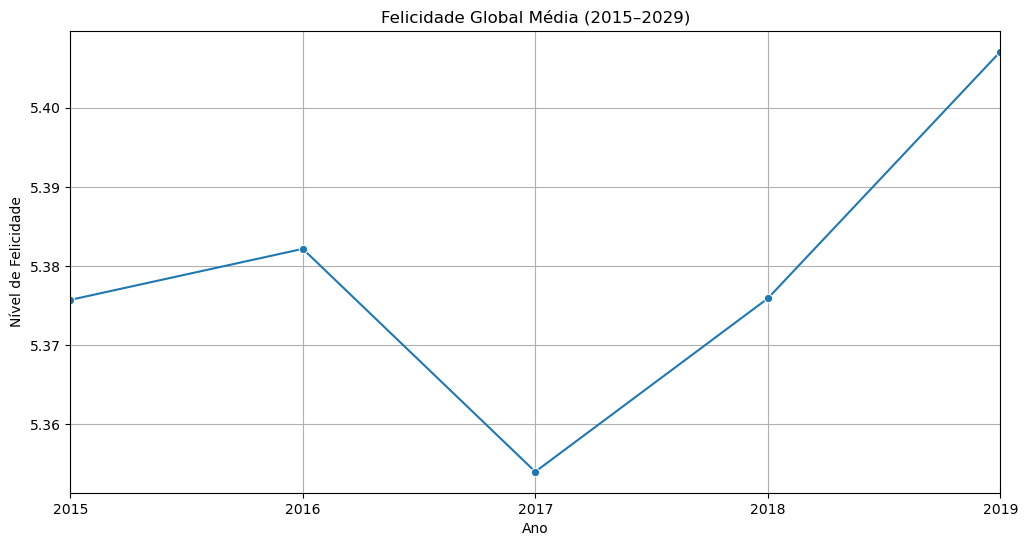

In [13]:
#1º Gráfico: Felicidade Média Global por ano
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='year', 
    y='happiness_score', 
    data=combined_df.groupby('year')['happiness_score'].mean().reset_index(),
    marker='o'
)

plt.xticks(range(2015,2020))
plt.xlim(2015,2019)
plt.title('Felicidade Global Média (2015–2029)')
plt.xlabel('Ano')
plt.ylabel('Nível de Felicidade')
plt.grid(True)
plt.savefig('../reports/felicidade_global_media.png')
plt.show()

C:\Users\Ledandeck\AppData\Local\Temp\ipykernel_10276\2550737940.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='happiness_score', y='country', data=top, palette='viridis')


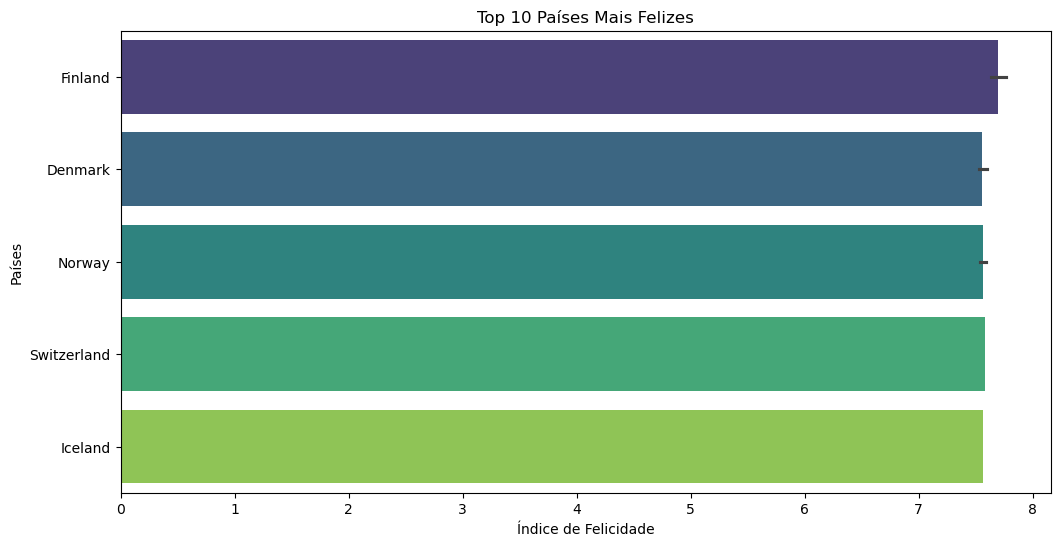

C:\Users\Ledandeck\AppData\Local\Temp\ipykernel_10276\2550737940.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='happiness_score', y='country', data=top2019, palette='viridis')


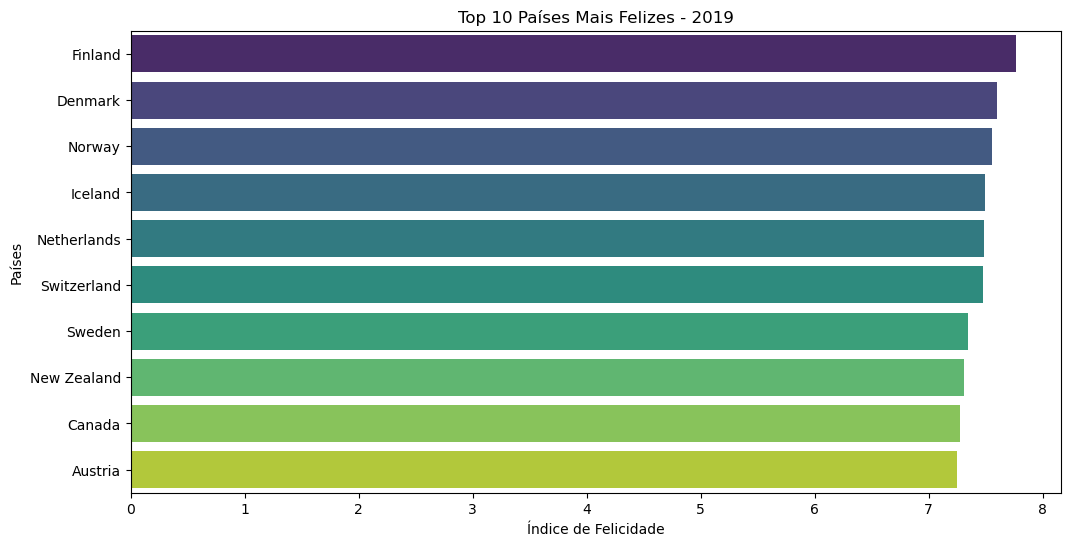

In [45]:

#2º Gráfico: Top 10 Países Mais Felizes
top = combined_df.nlargest(10, 'happiness_score')
top2019 = combined_df[combined_df['year'] == 2019].nlargest(10, 'happiness_score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='happiness_score', y='country', data=top, palette='viridis')
plt.title('Top 10 Países Mais Felizes')
plt.xlabel('Índice de Felicidade')
plt.ylabel('Países')
plt.savefig('../reports/top10_Geral.png')
plt.show()
#3º Gráfico: Top 10 Países Mais Felizes - 2019
plt.figure(figsize=(12, 6))
sns.barplot(x='happiness_score', y='country', data=top2019, palette='viridis')
plt.title('Top 10 Países Mais Felizes - 2019')
plt.xlabel('Índice de Felicidade')
plt.ylabel('Países')
plt.savefig('../reports/top10_2019.png')
plt.show()

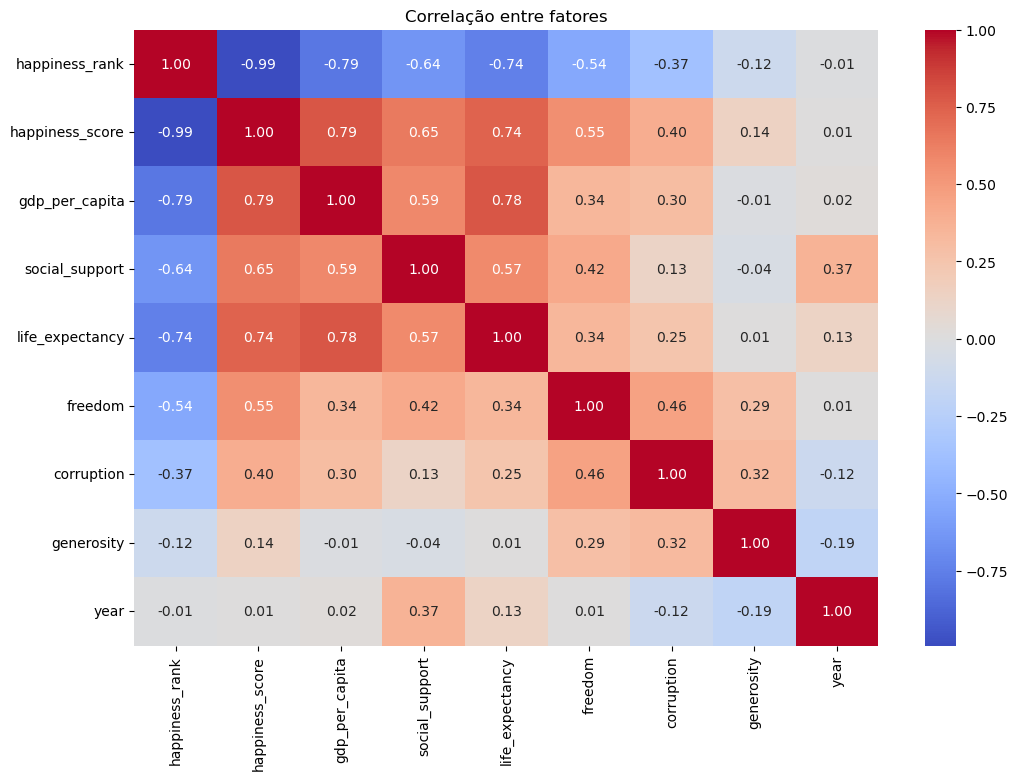

In [49]:
#4º Gráfico: Correlação entre fatores que medem a felicidade

numeric_cols = combined_df.select_dtypes(include=np.number).columns.tolist()
corr_matrix = combined_df[numeric_cols].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre fatores')
plt.savefig('../reports/correlation_heatmap_fatores_felicidade.png')
plt.show()

In [37]:
#Extra: Regressão Linear - 
caracteristicas = ['gdp_per_capita', 'social_support', 'life_expectancy', 'freedom']
X = combined_df[caracteristicas]
y = combined_df['happiness_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")

print(f"R²: {r2:.2f}")

RMSE: 0.56
R²: 0.74


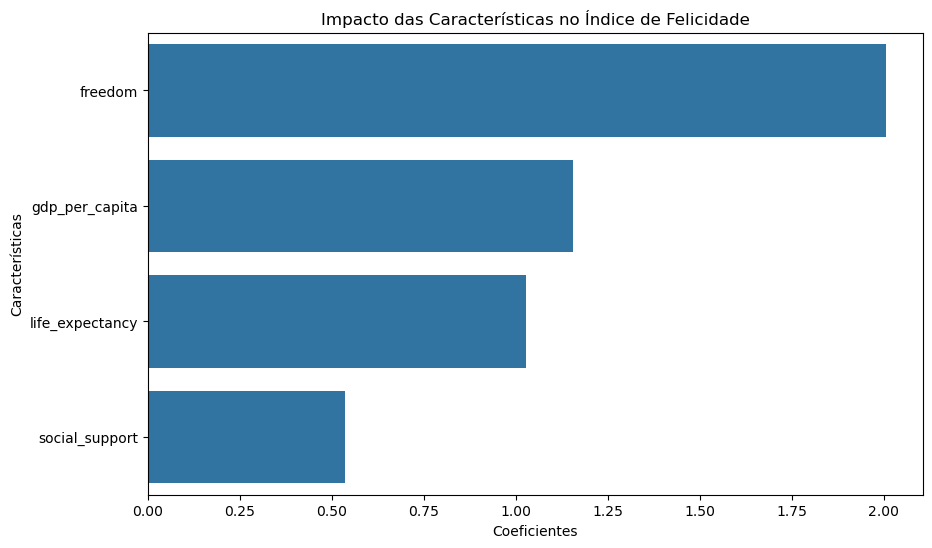

In [43]:
#5º Gráfico: Impacto das Características no Índice de Felicidade - Gráfico gerado a partir da regressão linear
features = X_train.columns  
coeficientes = pd.DataFrame({'Características': features, 'Coeficientes': model.coef_})
coeficientes = coeficientes.sort_values('Coeficientes', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficientes', y='Características', data=coeficientes)
plt.title('Impacto das Características no Índice de Felicidade')
plt.savefig('../reports/carcteristicas_ind_felicidade.png')
plt.show()